In [1]:
import numpy as np
import keras
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
%matplotlib inline

Using TensorFlow backend.
/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.6 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.7
  return f(*args, **kwds)


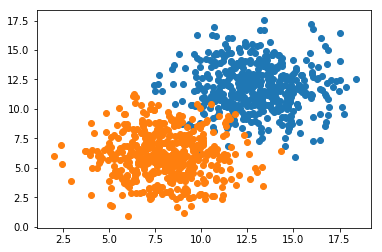

In [2]:
n_pts = 500
np.random.seed(0)
Xa = np.array([np.random.normal(13, 2, n_pts), np.random.normal(12, 2, n_pts)]).T
Xb = np.array([np.random.normal(8, 2, n_pts), np.random.normal(6, 2, n_pts)]).T
 
X = np.vstack((Xa, Xb))
Y = np.matrix(np.append(np.zeros(n_pts), np.ones(n_pts))).T
 
plt.scatter(X[:n_pts,0], X[:n_pts,1])
plt.scatter(X[n_pts:,0], X[n_pts:,1])

In [3]:
model=Sequential()
model.add(Dense(units=1, input_shape=(2, ), activation='sigmoid'))
adam=Adam(lr=0.1 )
model.compile(adam, loss='binary_crossentropy', metrics=['accuracy'])
h=model.fit(x=X, y=Y, verbose=1, batch_size=50, epochs=500, shuffle='true')

Epoch 1/500
1000/1000 [==============================] - 0s 169us/step - loss: 1.5506 - acc: 0.5430
Epoch 2/500
1000/1000 [==============================] - 0s 17us/step - loss: 0.6619 - acc: 0.6070
Epoch 3/500
1000/1000 [==============================] - 0s 17us/step - loss: 0.4454 - acc: 0.8600
Epoch 4/500
1000/1000 [==============================] - 0s 18us/step - loss: 0.3901 - acc: 0.8940
Epoch 5/500
1000/1000 [==============================] - 0s 17us/step - loss: 0.3469 - acc: 0.9040
Epoch 6/500
1000/1000 [==============================] - 0s 18us/step - loss: 0.3139 - acc: 0.9220
Epoch 7/500
1000/1000 [==============================] - 0s 20us/step - loss: 0.2945 - acc: 0.9320
Epoch 8/500
1000/1000 [==============================] - 0s 18us/step - loss: 0.2663 - acc: 0.9380
Epoch 9/500
1000/1000 [==============================] - 0s 18us/step - loss: 0.2396 - acc: 0.9570
Epoch 10/500
1000/1000 [==============================] - 0s 18us/step - loss: 0.2236 - acc: 0.9620
Epoch 11

Text(0.5,0,'epoch')

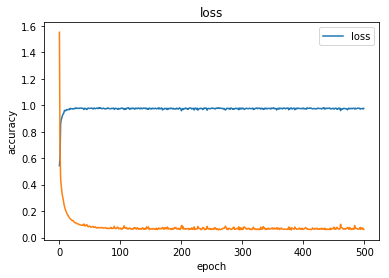

In [4]:
plt.plot(h.history['acc'])
 
plt.legend(['accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
 
plt.plot(h.history['loss'])
plt.legend(['loss'])
plt.title('loss')
plt.xlabel('epoch')

In [5]:
def plot_decision_boundary(X, y, model):
    x_span = np.linspace(min(X[:,0]) - 1, max(X[:,0]) + 1)
    y_span = np.linspace(min(X[:,1]) - 1, max(X[:,1]) + 1)
    xx, yy = np.meshgrid(x_span, y_span)
    xx_, yy_ = xx.ravel(), yy.ravel()
    grid = np.c_[xx_, yy_]
    pred_func = model.predict(grid)
    z = pred_func.reshape(xx.shape)
    plt.contourf(xx, yy, z)

prediction is:  [[0.9999856]]


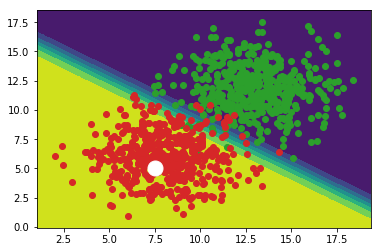

In [9]:
plot_decision_boundary(X, Y, model)
plt.scatter(X[:n_pts,0], X[:n_pts,1])
plt.scatter(X[n_pts:,0], X[n_pts:,1])
 
plot_decision_boundary(X, Y, model)
plt.scatter(X[:n_pts,0], X[:n_pts,1])
plt.scatter(X[n_pts:,0], X[n_pts:,1])
x = 7.5
y = 5

point = np.array([[x, y]])
prediction = model.predict(point)
plt.plot([x], [y], marker='o', markersize=15, color="white")
print("prediction is: ",prediction)